In [1]:
!hostname

c0709a-s30.ufhpc


In [3]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [4]:
fname = 'root://cmseos.fnal.gov//store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/btagsf/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root'

tree = Tree(fname)

  0%|          | 0/1 [00:00<?, ?it/s]

Using local path: /cmsuf/data/store/user/ekoenig/root/cmseos.fnal.gov/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/btagsf/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Copying root://cmseos.fnal.gov//store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/btagsf/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root to local path


[241.7MB/241.7MB][100%][==================================================][26.86MB/s]  
100%|██████████| 1/1 [00:09<00:00,  9.82s/it]


In [5]:
tree.fields

['Event',
 'H1_b1_btag',
 'H1_b1_eta',
 'H1_b1_genHflag',
 'H1_b1_m',
 'H1_b1_phi',
 'H1_b1_pt',
 'H1_b2_btag',
 'H1_b2_eta',
 'H1_b2_genHflag',
 'H1_b2_m',
 'H1_b2_phi',
 'H1_b2_pt',
 'H1_eta',
 'H1_m',
 'H1_phi',
 'H1_pt',
 'H2_b1_btag',
 'H2_b1_eta',
 'H2_b1_genHflag',
 'H2_b1_m',
 'H2_b1_phi',
 'H2_b1_pt',
 'H2_b2_btag',
 'H2_b2_eta',
 'H2_b2_genHflag',
 'H2_b2_m',
 'H2_b2_phi',
 'H2_b2_pt',
 'H2_eta',
 'H2_m',
 'H2_phi',
 'H2_pt',
 'HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5',
 'HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5_ObjectMatched',
 'HX_b1_btag',
 'HX_b1_eta',
 'HX_b1_genHflag',
 'HX_b1_m',
 'HX_b1_phi',
 'HX_b1_pt',
 'HX_b2_btag',
 'HX_b2_eta',
 'HX_b2_genHflag',
 'HX_b2_m',
 'HX_b2_phi',
 'HX_b2_pt',
 'HX_eta',
 'HX_m',
 'HX_phi',
 'HX_pt',
 'LHEPdfWeight',
 'LHEPdfWeight_var0',
 'LHEPdfWeight_var1',
 'LHEPdfWeight_var10',
 'LHEPdfWeight_var100',
 'LHEPdfWeight_var11',
 'LHEPdfWeight_var12',
 'LHEPdfWeight_var13',
 'LHEPdfWeight_var14',

In [8]:
tree.scale, tree.bSFshape_central, tree.n_jet

(<Array [1.13e-06, 1.13e-06, ... 1.13e-06] type='172065 * float64'>,
 <Array [0.672, 0.813, 0.718, ... 0.625, 1.12] type='172065 * float32'>,
 <Array [7, 6, 6, 8, 8, 7, ... 7, 11, 9, 6, 6] type='172065 * int32'>)

100%|██████████| 1/1 [00:00<00:00, 17.34it/s]


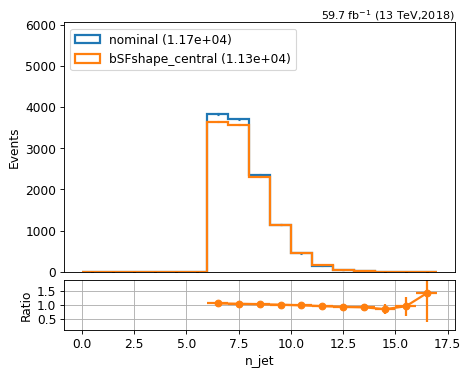

In [32]:
ratio = []
study.quick(
    [tree, tree],
    scale=[None, lambda t : t.bSFshape_central],
    label=['nominal', 'bSFshape_central'],
    varlist=['n_jet'],
    legend=True,
    ratio=True, 
    r_store=ratio
)

ratio = ratio[0][0]

In [65]:
ak.std(tree.scale)

4.700783201036315e-09

In [52]:
v_ratio = { int(x) : y for x, y in zip(ratio.x_array, ratio.y_array) }
v_ratio

{6: 1.0510039767025616,
 7: 1.0368142952517785,
 8: 1.0205842428649066,
 9: 1.0046634922617803,
 10: 0.9815081210444783,
 11: 0.9532031499476799,
 12: 0.9259501560817515,
 13: 0.911169256662527,
 14: 0.8431195170381166,
 15: 0.9483370497202371,
 16: 1.4195523940938952}

In [59]:
%timeit ak.from_regular(np.vectorize(v_ratio.get)(tree.n_jet))

8.63 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
%timeit ratio.evaluate(tree.n_jet)

2.81 ms ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
tree.bSFshape_central * ratio.y_array[tree.n_jet - 6]

<Array [0.697, 0.854, 0.755, ... 0.657, 1.18] type='172065 * float64'>

IndexError: index 12 is out of bounds for axis 0 with size 11

100%|██████████| 1/1 [00:00<00:00, 12.10it/s]


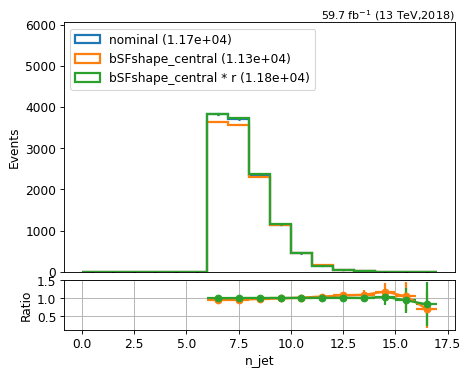

In [33]:
store = []
study.quick(
    [tree, tree, tree],
    scale=[None, lambda t : t.bSFshape_central, lambda t : t.bSFshape_central * ratio.evaluate(t.n_jet)],
    label=['nominal', 'bSFshape_central', 'bSFshape_central * r'],
    varlist=['n_jet'],
    legend=True,
    ratio=True, r_inv=True,
    r_ylim=None,
    r_store=store
)

In [36]:

store[0][1].y_array

array([1.        , 1.00684292, 1.00795135, 1.00792342, 1.01179581,
       1.01484729, 1.01471623, 1.00811095, 1.04035593, 0.94452524,
       0.83402679])